# Assignment 3 
by [Jay Nakum](https://jaynakum.github.io) [20BCP304D]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
DATA = pd.read_csv('./datasets/creditcard.csv')
DATA

In [ ]:
DATA.describe()

In [ ]:
DATA.isna().any()
DATA.isna().sum()

In [ ]:
DATA['Class'].value_counts()

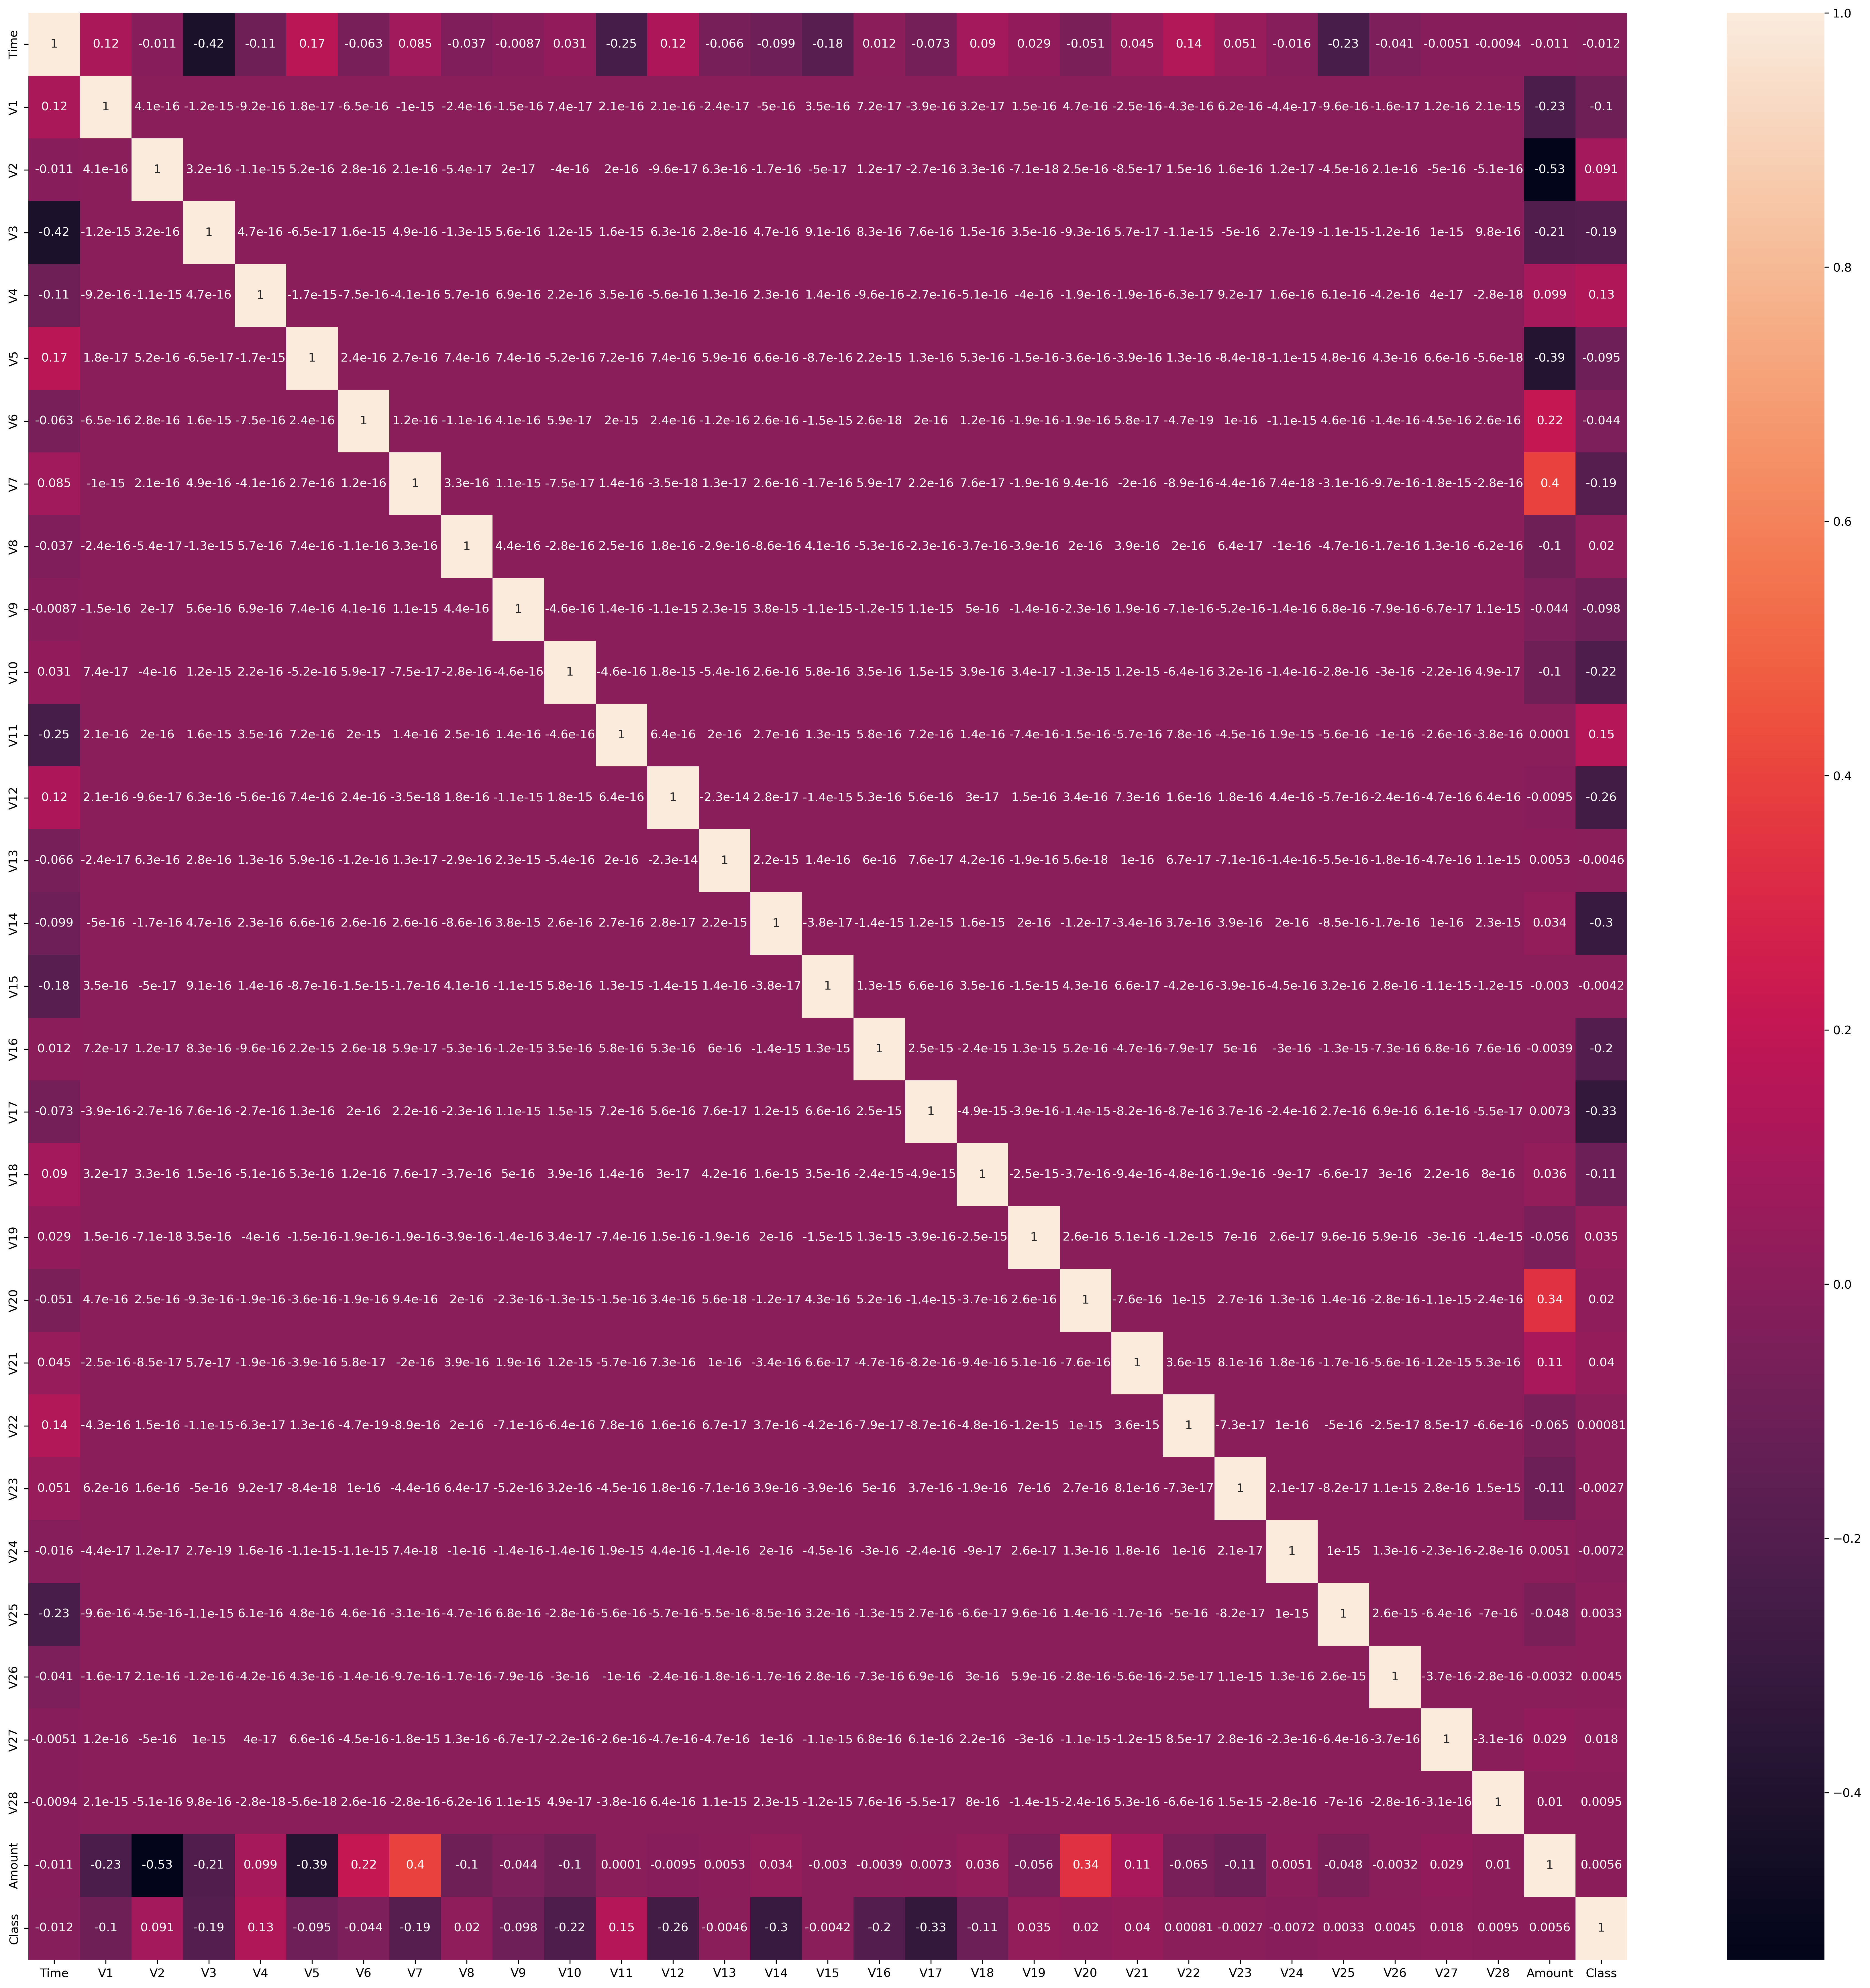

In [8]:
fig = plt.figure(figsize=(30, 30), dpi=300)
mat = DATA.corr()
sns.heatmap(mat, annot=True);

In [ ]:
X = DATA.drop('Class', axis=1)
Y = DATA['Class']
Y.unique()

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)
xTrain.shape

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier()
model.fit(xTrain, yTrain)

RandomForestClassifier()

In [16]:
pred = model.predict(xTest)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

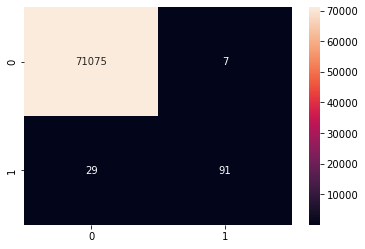

In [18]:
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat, annot=True, fmt='d');

In [19]:
accuracy_score(yTest, pred)

0.9994943962248252

In [20]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.76      0.83       120

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



## Oversampling

In [21]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, random_state=0)

In [22]:
from imblearn.over_sampling import SMOTE
over = SMOTE()

In [24]:
new_xTrain, new_yTrain = over.fit_resample(xTrain, yTrain)
new_yTrain.value_counts()

0    213233
1    213233
Name: Class, dtype: int64

In [25]:
model = RandomForestClassifier()
model.fit(new_xTrain, new_yTrain)

RandomForestClassifier()

In [26]:
pred = model.predict(xTest)

In [27]:
accuracy_score(yTest, pred)

0.9995365298727564

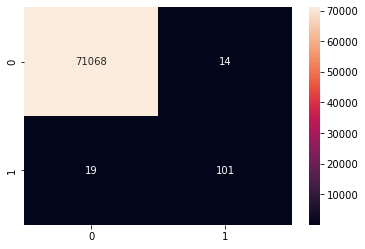

In [28]:
mat = confusion_matrix(yTest, pred)
sns.heatmap(mat, annot=True, fmt='d');

In [29]:
print(classification_report(yTest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.84      0.86       120

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202

